In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.1/715.1 kB 4.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [4]:
!cp /content/drive/MyDrive/DentalImages/YOLO_dataset.zip /content/

In [5]:
!unzip YOLO_dataset.zip

Archive:  YOLO_dataset.zip
   creating: YOLO_dataset/images/
   creating: YOLO_dataset/labels/
  inflating: YOLO_dataset/data.yaml  
  inflating: YOLO_dataset/images/train/1.png  
  inflating: YOLO_dataset/images/train/10.png  
  inflating: YOLO_dataset/images/train/11.png  
  inflating: YOLO_dataset/images/train/12.png  
  inflating: YOLO_dataset/images/train/13.png  
  inflating: YOLO_dataset/images/train/14.png  
  inflating: YOLO_dataset/images/train/15.png  
  inflating: YOLO_dataset/images/train/16.png  
  inflating: YOLO_dataset/images/train/17.png  
  inflating: YOLO_dataset/images/train/18.png  
  inflating: YOLO_dataset/images/train/19.png  
  inflating: YOLO_dataset/images/train/2.png  
  inflating: YOLO_dataset/images/train/20.png  
  inflating: YOLO_dataset/images/train/21.png  
  inflating: YOLO_dataset/images/train/22.png  
  inflating: YOLO_dataset/images/train/23.png  
  inflating: YOLO_dataset/images/train/24.png  
  inflating: YOLO_dataset/images/train/25.png  
  inf

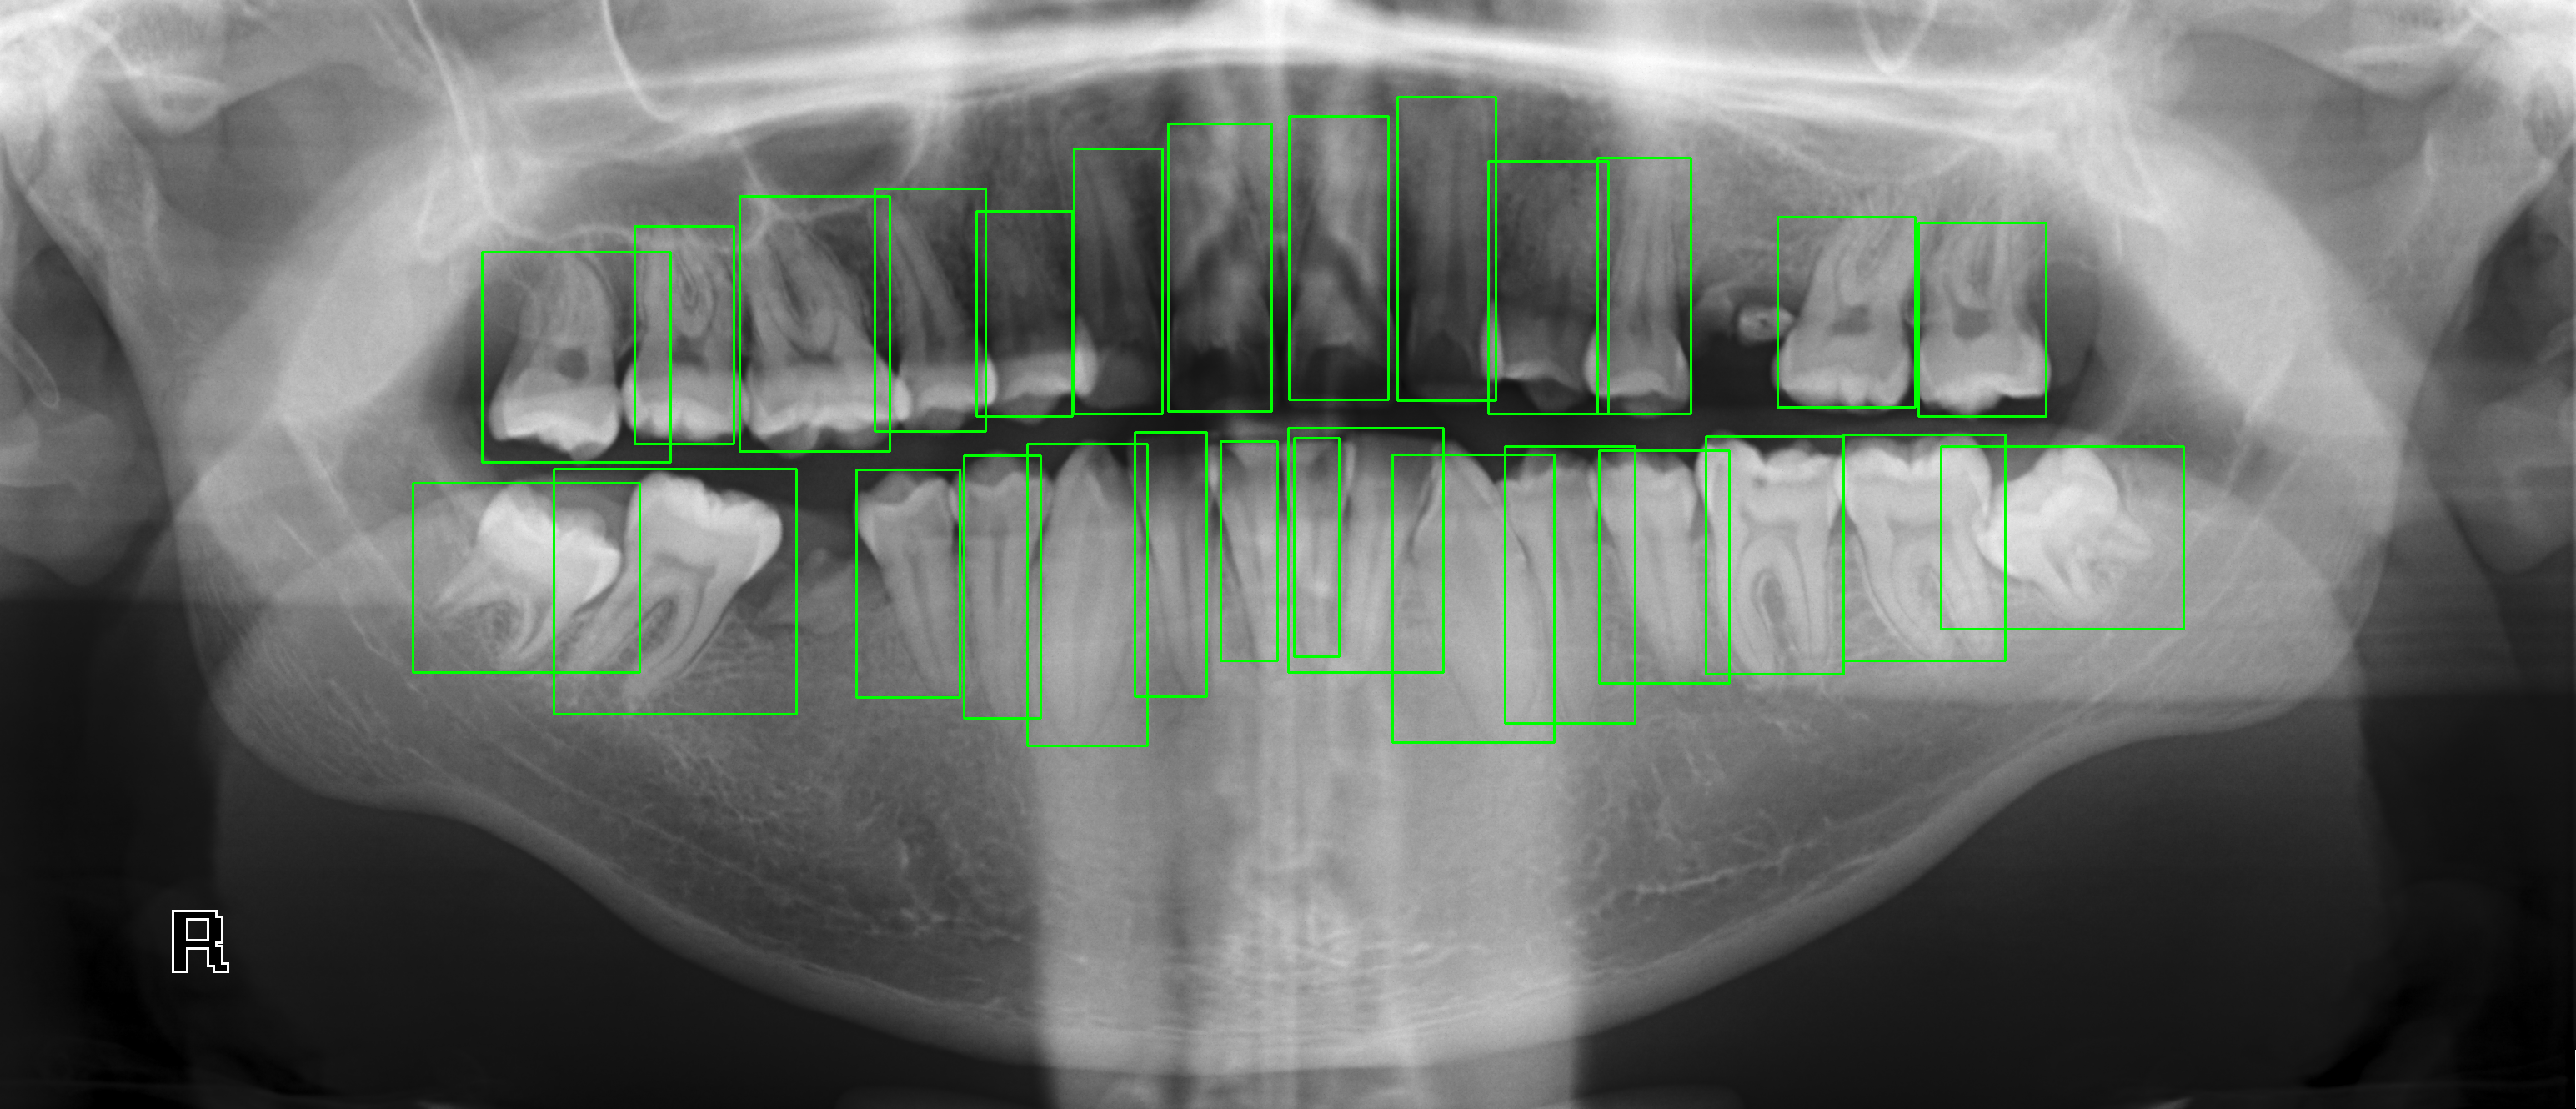

In [6]:
# Sanity check
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

YOLO_DATASET_LOCATION = "/content/YOLO_dataset/"
IMAGE_NUMBER = 2
# Load the image
image = cv2.imread(f"{YOLO_DATASET_LOCATION}images/train/{IMAGE_NUMBER}.png")

# Load the bounding boxes
with open(f"{YOLO_DATASET_LOCATION}labels/train/{IMAGE_NUMBER}.txt", "r") as f:
    lines = f.readlines()


# Function to draw a box on the image
def draw_box(image, box):
    # Parse the YOLO format
    class_id, x_center, y_center, width, height = map(float, box.split())

    # Denormalize the values
    x_center *= image.shape[1]
    y_center *= image.shape[0]
    width *= image.shape[1]
    height *= image.shape[0]

    # Calculate the top-left and bottom-right points
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)


# Draw all boxes on the image
for line in lines:
    draw_box(image, line)

cv2_imshow(image)

In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")
results = model.train(data="/content/YOLO_dataset/data.yaml", epochs=1000)

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/YOLO_dataset/data.yaml, epochs=1000, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 18.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 80.7MB/s]


AMP: checks passed ✅


train: Scanning /content/YOLO_dataset/labels/train... 88 images, 2 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<00:00, 422.80it/s]

train: New cache created: /content/YOLO_dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/YOLO_dataset/labels/val... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<00:00, 264.57it/s]

val: New cache created: /content/YOLO_dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      2.81G      5.839       3.82      4.306        389        640: 100%|██████████| 6/6 [00:13<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.70s/it]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      3.14G      5.941      3.702      4.271        410        640: 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      2.72G      5.658      3.391      4.213        430        640: 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000       2.9G      5.503      3.087      4.024        588        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      3.12G      5.118      2.805      3.915        526        640: 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      3.08G      4.585      2.622      3.845        376        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      2.89G      4.309      2.324      3.658        267        640: 100%|██████████| 6/6 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      2.81G      3.989      2.128      3.491        279        640: 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      2.96G      3.918      1.961       3.16        497        640: 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      2.98G      3.505      1.886      3.071        335        640: 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      2.79G      3.375      1.787      2.903        350        640: 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      2.78G      3.118      1.652      2.629        437        640: 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      2.68G      3.015      1.552      2.423        343        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      3.05G       2.75      1.449       2.28        438        640: 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      2.89G      2.752      1.405      2.129        385        640: 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      2.69G      2.633      1.355      2.089        475        640: 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      3.15G      2.536      1.368      2.118        410        640: 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         28        784          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      3.19G       2.54      1.331       2.05        527        640: 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         28        784      0.141      0.023     0.0138    0.00272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      2.88G      2.397      1.294      2.009        533        640: 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         28        784      0.174     0.0536     0.0381    0.00704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      2.71G      2.358      1.241      1.895        366        640: 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         28        784      0.579      0.372      0.372     0.0994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      2.84G      2.287       1.23      1.868        346        640: 100%|██████████| 6/6 [00:01<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         28        784      0.702      0.633      0.621      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      2.75G      2.314      1.213      1.855        353        640: 100%|██████████| 6/6 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         28        784      0.727       0.69      0.678      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      2.61G      2.306      1.198      1.839        501        640: 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         28        784      0.727      0.705      0.706      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      2.88G      2.254      1.173      1.811        345        640: 100%|██████████| 6/6 [00:01<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         28        784      0.727      0.714      0.735      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      2.62G      2.238      1.205      1.803        233        640: 100%|██████████| 6/6 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         28        784      0.773       0.74       0.77      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      2.74G      2.223      1.161      1.755        396        640: 100%|██████████| 6/6 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         28        784      0.814      0.778      0.796      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      2.83G      2.191      1.161       1.78        401        640: 100%|██████████| 6/6 [00:01<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         28        784      0.768      0.744      0.726      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      3.16G      2.157      1.123      1.685        426        640: 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         28        784      0.764      0.809      0.791      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      3.13G      2.124      1.078      1.611        449        640: 100%|██████████| 6/6 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         28        784      0.651      0.719      0.683      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000       2.8G      2.128      1.159      1.707        402        640: 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         28        784      0.783      0.787      0.816      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      2.83G      2.034      1.116       1.69        340        640: 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         28        784      0.815      0.802      0.824      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      2.65G      2.036      1.092      1.647        389        640: 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         28        784      0.871      0.852      0.877      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      2.64G       2.04      1.038      1.627        334        640: 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         28        784      0.873       0.83      0.846      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      3.21G      2.041       1.03      1.594        595        640: 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         28        784      0.823      0.838      0.847       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      2.65G      1.987      1.048      1.614        276        640: 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         28        784      0.894       0.87      0.886      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      2.99G      2.076      1.046      1.624        445        640: 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         28        784      0.874      0.835      0.869      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      2.63G      1.997      1.027      1.561        450        640: 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         28        784      0.902      0.878      0.901       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      2.73G      2.006       1.04      1.635        263        640: 100%|██████████| 6/6 [00:01<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         28        784      0.838      0.866      0.869       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      2.61G      1.964      1.012      1.528        467        640: 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         28        784      0.863      0.868      0.866      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      3.12G      1.915      1.004      1.573        378        640: 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         28        784       0.89      0.849      0.866      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      2.79G      1.929     0.9731       1.53        483        640: 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         28        784      0.885      0.871      0.884       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      3.05G       1.88     0.9716      1.534        380        640: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         28        784       0.89      0.865      0.878      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      2.64G      1.939     0.9697      1.506        484        640: 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         28        784      0.871      0.862      0.876      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      2.66G      1.862      0.963      1.494        386        640: 100%|██████████| 6/6 [00:01<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         28        784      0.887      0.863      0.883      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      3.34G      1.864     0.9431      1.511        373        640: 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         28        784      0.907      0.874      0.895      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000       2.9G      1.828      0.929      1.463        441        640: 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         28        784      0.872      0.827      0.859        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      3.01G      1.834     0.9388      1.478        466        640: 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         28        784      0.882      0.847      0.866       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      2.93G      1.841     0.9524      1.485        412        640: 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         28        784       0.87       0.87      0.882      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      2.62G      1.814     0.9125       1.44        427        640: 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         28        784      0.869      0.857       0.87      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      2.67G      1.813      0.882      1.424        384        640: 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         28        784      0.883      0.865      0.881      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      2.86G       1.84     0.9262      1.487        277        640: 100%|██████████| 6/6 [00:01<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         28        784      0.895      0.866      0.895      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      2.72G      1.809     0.8955      1.457        326        640: 100%|██████████| 6/6 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         28        784      0.898      0.893      0.895       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      2.88G       1.83     0.8943      1.398        369        640: 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         28        784      0.894      0.881      0.893      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      2.87G      1.887      0.952      1.557        398        640: 100%|██████████| 6/6 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         28        784        0.9      0.899      0.897      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      2.85G       1.76     0.8983      1.408        425        640: 100%|██████████| 6/6 [00:01<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         28        784      0.884      0.889      0.891      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      2.82G      1.801     0.9152      1.432        405        640: 100%|██████████| 6/6 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         28        784      0.901      0.893      0.897      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      2.78G      1.755     0.8784      1.395        414        640: 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         28        784      0.905      0.894      0.908      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      3.25G      1.736     0.8692      1.387        403        640: 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         28        784      0.888      0.874      0.899       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      3.15G      1.709     0.8656      1.388        420        640: 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         28        784      0.916      0.875      0.903      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      2.86G      1.743     0.8654      1.378        377        640: 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         28        784      0.902      0.891      0.903      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      3.21G      1.755     0.8502      1.369        499        640: 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         28        784       0.89      0.885      0.903      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      2.62G      1.727     0.8474      1.387        435        640: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         28        784      0.917      0.908      0.916       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      2.89G        1.7     0.8388       1.35        358        640: 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         28        784      0.921      0.901      0.906      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      2.62G      1.719       0.86      1.383        424        640: 100%|██████████| 6/6 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         28        784      0.894      0.881      0.892      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      2.67G      1.713     0.8863      1.402        293        640: 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         28        784      0.912      0.893        0.9      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      2.92G      1.711     0.8537       1.37        468        640: 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         28        784      0.918      0.904      0.913      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      2.64G      1.681     0.8352      1.369        472        640: 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         28        784      0.918      0.898      0.913      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      2.87G      1.702     0.8361      1.375        337        640: 100%|██████████| 6/6 [00:01<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         28        784       0.92      0.911      0.919      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000         3G      1.685     0.8549      1.402        364        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         28        784      0.919      0.916      0.918      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      2.84G      1.721     0.8515      1.336        390        640: 100%|██████████| 6/6 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         28        784      0.901      0.902      0.916      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000       2.8G      1.746     0.8659      1.405        352        640: 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         28        784      0.908      0.895      0.917      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      2.87G      1.707     0.8521      1.332        368        640: 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         28        784      0.906      0.911       0.92      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      2.83G      1.709     0.8231      1.329        484        640: 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         28        784      0.896      0.915      0.915      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      2.85G      1.683     0.8148      1.345        409        640: 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         28        784      0.906      0.907      0.913      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      2.63G      1.694     0.8211      1.333        315        640: 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         28        784      0.918      0.902      0.916      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      2.88G      1.651     0.8428      1.336        244        640: 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         28        784      0.919      0.901      0.909      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000       2.8G      1.658     0.8185      1.343        350        640: 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         28        784       0.92      0.894        0.9      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      2.86G      1.661     0.8524      1.384        251        640: 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         28        784      0.935      0.902      0.923      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      3.05G      1.687     0.8151      1.286        475        640: 100%|██████████| 6/6 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         28        784      0.936      0.917      0.934       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      2.77G      1.664     0.8214      1.339        396        640: 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         28        784      0.917      0.919      0.926        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      2.77G      1.658     0.7991      1.322        511        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         28        784      0.927      0.918      0.924      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      2.78G      1.707      0.805      1.294        472        640: 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         28        784      0.921      0.909      0.925      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      2.92G      1.684     0.8145      1.322        463        640: 100%|██████████| 6/6 [00:01<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         28        784      0.917      0.887      0.916      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      2.69G      1.646      0.821      1.328        465        640: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         28        784      0.922      0.894      0.911      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000       2.9G      1.649      0.818        1.3        438        640: 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         28        784      0.925      0.894      0.914      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      2.78G      1.664      0.823       1.33        429        640: 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         28        784      0.918      0.908      0.915      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      2.74G      1.615     0.7731      1.282        548        640: 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         28        784       0.92      0.915      0.915      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      3.11G      1.649     0.7966       1.32        333        640: 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         28        784      0.928      0.929      0.923      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      3.11G      1.652     0.7883      1.306        453        640: 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         28        784      0.938        0.9      0.921      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      2.67G      1.605     0.7884      1.297        468        640: 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         28        784       0.92      0.911      0.926      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      2.85G      1.589      0.785      1.271        448        640: 100%|██████████| 6/6 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         28        784      0.924      0.906       0.92      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      3.23G      1.597     0.7867      1.293        454        640: 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         28        784      0.933       0.92      0.924      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      3.05G       1.59      0.768      1.264        504        640: 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         28        784      0.928      0.911      0.918      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      3.06G      1.604     0.8171      1.304        417        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         28        784      0.928      0.918      0.929      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      2.99G      1.597     0.7813      1.268        326        640: 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         28        784      0.926      0.918      0.927      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      2.71G       1.57       0.75      1.277        405        640: 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         28        784      0.924      0.919      0.919      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      2.87G      1.564     0.7645      1.261        279        640: 100%|██████████| 6/6 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         28        784      0.921      0.924       0.92      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      2.81G      1.576      0.776      1.275        398        640: 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         28        784      0.927      0.928      0.933        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      2.86G      1.546     0.7755      1.257        510        640: 100%|██████████| 6/6 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         28        784      0.934      0.926      0.928      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      2.79G      1.597     0.7632      1.257        533        640: 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         28        784      0.927       0.92      0.917      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      2.63G      1.544     0.7458      1.261        398        640: 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         28        784      0.933      0.919      0.911      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      2.68G      1.588     0.7556      1.275        407        640: 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         28        784      0.925      0.926      0.924      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      2.63G      1.492     0.7483      1.283        237        640: 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         28        784      0.918      0.915      0.918      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      2.79G      1.587     0.7545      1.251        517        640: 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         28        784      0.924       0.93      0.934      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      3.08G       1.53     0.7448      1.249        357        640: 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         28        784      0.927      0.925       0.93      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      2.74G      1.558     0.7554      1.259        283        640: 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         28        784      0.925      0.913      0.916       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      2.87G      1.589     0.7643      1.267        376        640: 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         28        784       0.92      0.898       0.91      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      3.04G      1.581     0.7592      1.256        378        640: 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         28        784      0.923       0.92      0.918      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      2.71G      1.545     0.7394      1.263        361        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         28        784      0.928      0.911      0.915      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      2.84G       1.57     0.7681      1.245        380        640: 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         28        784      0.935      0.915      0.924      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      2.65G      1.561     0.7385      1.224        558        640: 100%|██████████| 6/6 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         28        784      0.936      0.907      0.931      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      2.75G      1.545     0.7561      1.243        354        640: 100%|██████████| 6/6 [00:01<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         28        784      0.941      0.913      0.935      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      2.89G       1.56     0.7266      1.234        468        640: 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         28        784      0.939      0.926      0.935      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      2.69G      1.591     0.7542      1.248        427        640: 100%|██████████| 6/6 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         28        784      0.925      0.921      0.922      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      2.92G      1.527     0.7256       1.22        418        640: 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         28        784      0.931      0.914      0.925      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      2.92G      1.583     0.7501       1.25        491        640: 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         28        784      0.935      0.926      0.929      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      2.78G      1.525     0.7346      1.251        344        640: 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         28        784      0.933       0.92      0.927       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      2.98G      1.576     0.7278      1.214        436        640: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         28        784      0.945      0.925      0.934      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      2.76G      1.575      0.755      1.285        424        640: 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         28        784      0.928      0.922      0.923       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      2.68G      1.504     0.7295      1.209        351        640: 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         28        784      0.932      0.914      0.924      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000       2.7G      1.492     0.7216      1.224        502        640: 100%|██████████| 6/6 [00:01<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         28        784       0.92      0.919      0.927      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      2.73G      1.543     0.7287      1.233        512        640: 100%|██████████| 6/6 [00:01<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         28        784      0.938       0.92      0.927      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      2.67G      1.516     0.7226      1.225        402        640: 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         28        784      0.938      0.923      0.925      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      2.74G      1.514     0.7178      1.231        420        640: 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         28        784      0.939       0.92      0.924      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      2.82G      1.537      0.732      1.228        388        640: 100%|██████████| 6/6 [00:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         28        784      0.934      0.913       0.93      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      2.79G      1.604      0.742      1.236        444        640: 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         28        784      0.916      0.906      0.916       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      2.79G       1.61     0.7658      1.285        327        640: 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         28        784       0.93      0.918      0.928      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      2.89G       1.51     0.7326      1.235        376        640: 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         28        784      0.934      0.914      0.922      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      2.85G       1.58     0.7408      1.256        350        640: 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         28        784      0.932      0.918      0.926      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      2.88G      1.566     0.7351      1.249        406        640: 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         28        784      0.927      0.919       0.92      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      2.99G      1.533     0.7428      1.246        471        640: 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         28        784      0.921      0.917      0.913      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000       2.8G       1.56     0.7359      1.221        434        640: 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         28        784      0.927      0.925      0.918      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      2.81G      1.507     0.7373      1.242        342        640: 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         28        784      0.938      0.922      0.922      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      3.03G      1.511     0.6978      1.202        421        640: 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         28        784       0.94      0.935      0.932      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      2.63G      1.511     0.7109      1.212        484        640: 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         28        784      0.947       0.93      0.937      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      3.14G      1.505     0.7054      1.188        532        640: 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         28        784      0.933      0.934      0.934       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      2.84G      1.501     0.7189      1.193        445        640: 100%|██████████| 6/6 [00:01<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         28        784      0.935      0.938      0.936      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      3.25G      1.538     0.7407      1.234        344        640: 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         28        784      0.934      0.932      0.938      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000       3.2G      1.507     0.7175      1.201        412        640: 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         28        784       0.94      0.932      0.939      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      2.86G      1.512     0.7167      1.204        462        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         28        784      0.945      0.923      0.926      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      2.94G      1.467     0.6836      1.187        440        640: 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         28        784       0.94      0.925      0.927      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      2.81G      1.461     0.6989      1.214        373        640: 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         28        784      0.935      0.919      0.925      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      2.65G       1.49     0.7006      1.181        486        640: 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         28        784      0.935      0.922      0.926      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      2.83G       1.47     0.6983      1.192        460        640: 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         28        784      0.937      0.925       0.93      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      2.98G      1.449     0.6924      1.197        340        640: 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         28        784       0.94      0.925      0.926      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      2.85G      1.467     0.6909      1.186        436        640: 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         28        784       0.94      0.941      0.945      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      2.78G      1.466     0.6877      1.191        373        640: 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         28        784      0.941      0.935      0.943      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      3.06G      1.454     0.6894      1.172        381        640: 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         28        784      0.946      0.933      0.941      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      2.85G      1.443     0.6895       1.18        435        640: 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         28        784       0.94      0.933      0.943      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      2.76G      1.473     0.6974      1.208        373        640: 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         28        784      0.929       0.94      0.944      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      3.08G      1.443       0.69       1.17        496        640: 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         28        784      0.925       0.94      0.944      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      2.78G      1.438     0.6849      1.188        485        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         28        784      0.929      0.935       0.94      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      2.69G      1.451     0.7079      1.249        404        640: 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         28        784      0.933      0.926       0.93      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000       2.7G      1.512      0.702      1.181        571        640: 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         28        784      0.936      0.932      0.934      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      2.84G      1.497     0.7095      1.223        323        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         28        784      0.937      0.935      0.932      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      2.68G       1.47     0.7029      1.215        532        640: 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         28        784      0.937      0.929      0.922      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      2.67G      1.469      0.699      1.217        369        640: 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         28        784      0.933      0.919      0.917      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      2.66G      1.459     0.6962      1.191        405        640: 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         28        784      0.935      0.916      0.925      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      2.89G      1.459     0.6807      1.163        436        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         28        784      0.941       0.92       0.93      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      3.24G      1.487     0.6988      1.185        321        640: 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         28        784      0.943       0.93      0.934      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000       2.9G      1.441     0.6817      1.167        351        640: 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         28        784      0.944      0.936      0.938       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      3.15G      1.447     0.6794      1.205        494        640: 100%|██████████| 6/6 [00:01<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         28        784      0.928       0.93      0.927      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      3.04G      1.442     0.6625      1.155        462        640: 100%|██████████| 6/6 [00:01<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         28        784      0.926      0.932      0.924      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      2.86G      1.452      0.703      1.177        270        640: 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         28        784      0.922      0.918       0.92      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      2.96G      1.446     0.6917      1.202        329        640: 100%|██████████| 6/6 [00:01<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         28        784      0.926      0.921      0.924      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      2.68G      1.477     0.6938      1.185        431        640: 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         28        784      0.934      0.922      0.929      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      2.91G      1.478     0.6952      1.219        351        640: 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         28        784       0.93      0.927      0.934      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      2.77G      1.459     0.6767      1.166        515        640: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         28        784      0.935       0.93      0.937      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      2.62G      1.405     0.6616      1.172        429        640: 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         28        784      0.943      0.935      0.945       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      2.77G      1.446     0.6778      1.196        334        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         28        784      0.942      0.932      0.939      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      2.73G      1.435     0.6677      1.155        408        640: 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         28        784      0.933      0.932      0.934       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      2.65G      1.451     0.6845      1.139        438        640: 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         28        784      0.934      0.932      0.929      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      2.86G      1.472      0.691      1.194        524        640: 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         28        784      0.939      0.936      0.931      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      2.87G      1.446     0.6713      1.151        378        640: 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         28        784      0.943      0.932      0.941      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      2.64G      1.402     0.6781      1.191        244        640: 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         28        784      0.943      0.934      0.938      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000       2.9G      1.429     0.6596      1.166        468        640: 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         28        784      0.935      0.936      0.935      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      2.75G      1.415     0.6495      1.157        499        640: 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         28        784      0.933      0.931      0.932      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      2.71G      1.403     0.6626      1.148        482        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         28        784      0.932      0.927      0.936      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      2.66G      1.424     0.6656      1.141        549        640: 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         28        784       0.94      0.923      0.938       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      2.85G      1.422     0.6633      1.169        382        640: 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         28        784      0.941       0.94      0.943      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      3.04G      1.453      0.668      1.146        487        640: 100%|██████████| 6/6 [00:01<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         28        784      0.943      0.936       0.94      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      2.87G      1.383     0.6588      1.163        420        640: 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         28        784      0.937      0.928      0.934      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      2.69G      1.384     0.6671      1.199        315        640: 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         28        784      0.938      0.932      0.937      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      3.16G      1.401     0.6528      1.146        423        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         28        784      0.938      0.934      0.946      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      3.02G      1.456     0.6829      1.193        433        640: 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         28        784      0.938      0.922      0.943      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      2.86G      1.408     0.6562      1.176        343        640: 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         28        784      0.942      0.932       0.94      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      2.88G      1.396     0.6452      1.155        454        640: 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         28        784      0.943      0.933      0.939      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      3.16G      1.434     0.6446      1.179        422        640: 100%|██████████| 6/6 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         28        784      0.938      0.933      0.942      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      2.66G        1.4     0.6589      1.154        473        640: 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         28        784      0.939      0.917      0.936      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      2.67G      1.394     0.6682       1.16        399        640: 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         28        784      0.937      0.923      0.926      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      2.73G      1.385     0.6477      1.155        420        640: 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         28        784      0.943      0.939      0.934       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      2.62G      1.396     0.6469      1.191        349        640: 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         28        784      0.938       0.93      0.926      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      2.65G      1.449     0.6667      1.167        521        640: 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         28        784      0.928      0.926      0.925       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000       2.8G      1.406      0.644      1.138        401        640: 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         28        784      0.932      0.912      0.927      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000       2.7G      1.433     0.6769      1.181        412        640: 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         28        784      0.936      0.913      0.927      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      2.69G      1.433      0.669      1.153        461        640: 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         28        784      0.942      0.923      0.934      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      3.06G       1.39     0.6465      1.145        546        640: 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         28        784      0.946      0.931      0.937      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      2.85G      1.395     0.6446      1.151        448        640: 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         28        784      0.939      0.935      0.948      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      3.02G      1.378      0.641      1.182        375        640: 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         28        784      0.936      0.935      0.948      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      2.78G      1.396       0.65      1.152        356        640: 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         28        784       0.94      0.923      0.928      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      3.19G      1.378      0.645      1.127        476        640: 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         28        784      0.938      0.926       0.93      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      2.89G      1.373     0.6392      1.142        432        640: 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         28        784       0.94      0.937       0.94       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      2.82G       1.39     0.6563      1.154        295        640: 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         28        784      0.938      0.928      0.942      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      2.93G      1.386     0.6409      1.142        348        640: 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         28        784      0.941      0.926      0.939      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000       2.9G      1.372     0.6348      1.145        436        640: 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         28        784      0.946      0.935      0.943      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      3.17G      1.412     0.6442      1.136        516        640: 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         28        784      0.935      0.927      0.934      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000       2.8G      1.386     0.6324       1.16        392        640: 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         28        784      0.938      0.927      0.936      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      2.95G      1.401     0.6441      1.138        341        640: 100%|██████████| 6/6 [00:02<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         28        784      0.941      0.929      0.931      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      3.03G      1.385     0.6451      1.149        380        640: 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         28        784      0.944      0.938      0.939       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      3.01G      1.381     0.6405       1.15        454        640: 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         28        784      0.938      0.946      0.944      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      3.07G      1.389     0.6405      1.169        493        640: 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         28        784      0.936       0.94      0.942      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      2.67G       1.39     0.6301      1.131        543        640: 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         28        784      0.938      0.931       0.94      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000      2.87G      1.394     0.6441      1.132        501        640: 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         28        784      0.937      0.934      0.938      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      2.98G      1.384     0.6486      1.157        346        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         28        784      0.936      0.932      0.937      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      2.74G      1.386     0.6305      1.114        500        640: 100%|██████████| 6/6 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         28        784      0.932      0.926      0.935      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      2.91G      1.401     0.6532       1.18        542        640: 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         28        784      0.932      0.925      0.935      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      2.97G      1.363     0.6305      1.139        400        640: 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         28        784      0.941      0.927      0.938      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      3.39G      1.374     0.6348      1.157        402        640: 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         28        784      0.939      0.934      0.941      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000      2.99G      1.341     0.6252      1.161        409        640: 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         28        784      0.939      0.935       0.94      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      2.95G      1.349     0.6109      1.138        406        640: 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         28        784      0.937       0.94      0.944      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000      2.82G      1.352     0.6237      1.129        463        640: 100%|██████████| 6/6 [00:01<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         28        784      0.943      0.931      0.942      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000       2.8G      1.362     0.6292      1.138        558        640: 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         28        784      0.936      0.931      0.941      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      2.88G       1.35     0.6253      1.161        363        640: 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         28        784      0.937      0.925      0.936      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      2.86G      1.394     0.6356      1.153        330        640: 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         28        784      0.937      0.927      0.936      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      2.79G      1.384     0.6377      1.122        472        640: 100%|██████████| 6/6 [00:01<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         28        784       0.94      0.931       0.94      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000      2.72G      1.347     0.6264      1.139        367        640: 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         28        784      0.942      0.934      0.938      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000      2.84G      1.321     0.6239      1.114        340        640: 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         28        784      0.937      0.925      0.936       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      2.89G      1.305     0.6267      1.173        330        640: 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         28        784      0.936      0.928      0.935      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      2.58G      1.336     0.6229       1.13        404        640: 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         28        784       0.94       0.92      0.934       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      3.05G      1.314     0.6112      1.124        345        640: 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         28        784      0.942      0.929      0.941      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      2.96G      1.334      0.617       1.12        443        640: 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         28        784      0.937      0.932       0.94      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      2.94G      1.353     0.6282       1.13        599        640: 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         28        784      0.941      0.932       0.94      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000      2.85G      1.336     0.6287      1.115        373        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]

                   all         28        784       0.94      0.936       0.94      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      3.01G      1.342     0.6279      1.135        483        640: 100%|██████████| 6/6 [00:01<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         28        784      0.941      0.932      0.939       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000      2.89G      1.351     0.6226      1.129        427        640: 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         28        784       0.94      0.922      0.934      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      2.85G      1.326     0.6214      1.152        506        640: 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         28        784      0.943      0.936      0.945      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      3.01G      1.344     0.6232      1.124        394        640: 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         28        784      0.948      0.932      0.945      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      2.78G       1.33     0.6156      1.116        246        640: 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         28        784      0.941      0.932      0.939      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000      2.67G      1.339     0.6252      1.124        387        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         28        784      0.937      0.936      0.936      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000      3.08G      1.298     0.6123      1.123        394        640: 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         28        784      0.944      0.938      0.939      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      3.28G      1.347     0.6268      1.154        324        640: 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         28        784       0.94      0.934       0.93      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000      2.67G      1.321     0.6096      1.114        413        640: 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         28        784      0.941      0.935      0.937      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      2.88G      1.353     0.6289      1.121        384        640: 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         28        784      0.934      0.936      0.935      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000       2.6G      1.292     0.6122      1.113        427        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         28        784      0.941      0.935      0.943      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000      2.62G      1.324     0.6184      1.121        403        640: 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         28        784      0.944      0.939      0.947      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      2.63G      1.311     0.6113      1.122        359        640: 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         28        784      0.944      0.938       0.94      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000      2.78G      1.362     0.6231      1.114        468        640: 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         28        784      0.935      0.931      0.932      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      2.64G      1.312     0.6131      1.095        546        640: 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         28        784      0.934      0.923      0.928      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000       2.9G       1.34     0.6107      1.094        533        640: 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         28        784      0.947      0.935      0.943      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000       2.9G      1.293     0.5938      1.107        389        640: 100%|██████████| 6/6 [00:01<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         28        784      0.945      0.931      0.943      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000      2.84G      1.326     0.6324      1.145        569        640: 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         28        784      0.948      0.933      0.946      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000      2.71G      1.299     0.6035      1.098        388        640: 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         28        784       0.95      0.934      0.949      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000      2.94G      1.287      0.608      1.126        431        640: 100%|██████████| 6/6 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         28        784      0.942      0.935      0.943      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000      2.87G      1.285     0.6033      1.102        430        640: 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         28        784      0.942      0.932      0.946      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000      2.75G      1.331     0.6112      1.086        408        640: 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         28        784      0.936       0.94      0.949      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000      2.95G      1.298     0.6116      1.137        399        640: 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         28        784      0.939      0.941       0.94      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      2.67G      1.327     0.6181      1.128        492        640: 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         28        784      0.938      0.939      0.942      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      2.84G      1.316     0.6227      1.125        321        640: 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         28        784      0.942      0.936      0.939      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      2.87G      1.323     0.6063      1.116        424        640: 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         28        784      0.937      0.935      0.933      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      2.97G       1.32      0.607      1.112        405        640: 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         28        784      0.939      0.934       0.93      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      2.68G      1.329     0.6113       1.13        517        640: 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         28        784      0.941      0.938       0.94      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000      3.07G      1.344     0.6131      1.101        505        640: 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         28        784      0.947      0.931       0.94       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000      2.92G      1.323     0.6128      1.103        412        640: 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         28        784      0.939      0.935       0.93      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000      3.04G      1.309     0.6102      1.108        347        640: 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         28        784      0.943      0.932      0.932       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000      2.98G      1.305     0.6059      1.097        346        640: 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         28        784      0.936      0.939      0.935      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      2.94G      1.297     0.6044      1.115        412        640: 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         28        784      0.941       0.94       0.94      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      2.89G      1.303     0.6203      1.102        580        640: 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         28        784      0.943      0.938       0.94       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      3.14G      1.278     0.5982      1.134        230        640: 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         28        784      0.939      0.939      0.941      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      2.73G      1.263     0.5824      1.105        438        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         28        784      0.944      0.934      0.947      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      2.86G      1.281     0.5951      1.105        373        640: 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         28        784      0.941      0.939      0.945      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      2.69G      1.318     0.6031      1.116        487        640: 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         28        784      0.938      0.936      0.936      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000      2.89G      1.293     0.5996      1.082        403        640: 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         28        784      0.941       0.94      0.938      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      2.63G      1.293     0.6051      1.081        535        640: 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         28        784      0.942      0.946      0.941       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      2.68G      1.283     0.5967      1.137        328        640: 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         28        784      0.945      0.943      0.938      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000      2.77G      1.289     0.5973      1.088        463        640: 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         28        784      0.936      0.938      0.931      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      3.11G      1.264     0.5929      1.105        436        640: 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         28        784      0.937      0.941      0.939      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000      2.69G      1.254      0.591      1.098        317        640: 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         28        784      0.935       0.94      0.941      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000      3.14G      1.277     0.5875      1.087        336        640: 100%|██████████| 6/6 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         28        784      0.938      0.936       0.94      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000       2.7G      1.264      0.591      1.074        462        640: 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         28        784       0.94      0.935      0.939      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      2.76G      1.277     0.5877       1.08        340        640: 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         28        784      0.937      0.941      0.942      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      2.79G      1.311     0.5957      1.103        503        640: 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         28        784      0.941       0.94      0.941       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      3.02G      1.288     0.5835      1.073        351        640: 100%|██████████| 6/6 [00:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         28        784      0.942      0.941      0.936      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      2.77G      1.315     0.6016      1.099        470        640: 100%|██████████| 6/6 [00:01<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         28        784      0.939      0.938      0.937      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000      2.73G      1.321     0.6075      1.108        539        640: 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         28        784      0.931      0.936      0.933      0.542
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 234, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



284 epochs completed in 0.279 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


                   all         28        784      0.941      0.931      0.939      0.589
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


In [16]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.50 source='/content/YOLO_dataset/images/train'

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/88 /content/YOLO_dataset/images/train/1.png: 288x640 25 tooths, 70.8ms
image 2/88 /content/YOLO_dataset/images/train/10.png: 288x640 24 tooths, 7.0ms
image 3/88 /content/YOLO_dataset/images/train/11.png: 288x640 22 tooths, 6.9ms
image 4/88 /content/YOLO_dataset/images/train/12.png: 320x640 27 tooths, 59.0ms
image 5/88 /content/YOLO_dataset/images/train/13.png: 288x640 29 tooths, 7.3ms
image 6/88 /content/YOLO_dataset/images/train/14.png: 288x640 31 tooths, 8.2ms
image 7/88 /content/YOLO_dataset/images/train/15.png: 288x640 32 tooths, 6.9ms
image 8/88 /content/YOLO_dataset/images/train/16.png: 256x640 18 tooths, 56.2ms
image 9/88 /content/YOLO_dataset/images/train/17.png: 288x640 (no detections), 7.6ms
image 10/88 /content/YOLO_dataset/images/train/18.png: 288x640 32 tooths, 8.9ms
image 11/88 /content/YOLO_datase